In [5]:
import pandas as pd
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [6]:
np.random.seed(42)

def PointsInCircum(r, n=100):
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
           math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30))
            for x in range(1, n+1)]

In [7]:
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

df = df.append([(np.random.randint(-600,600),
                 np.random.randint(-600,600))
                  for i in range(300)])
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


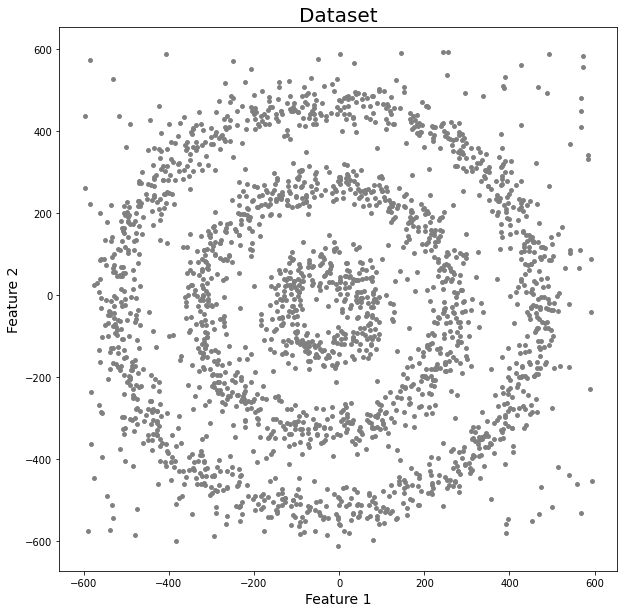

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], s=15, color='grey')
plt.title('Dataset', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

## KMeans

In [13]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4, random_state=42)
k_means.fit(df[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

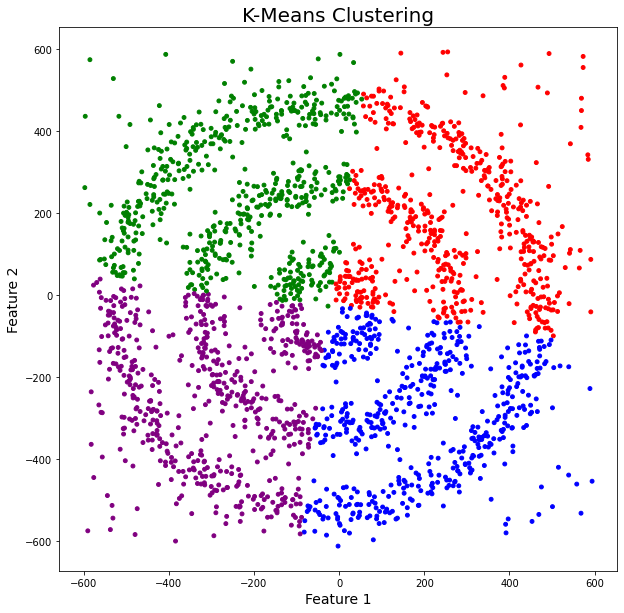

In [15]:
df['KMeans_labels'] = k_means.labels_

colors=['purple', 'red', 'blue', 'green']
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['KMeans_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

## Agglomerative Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

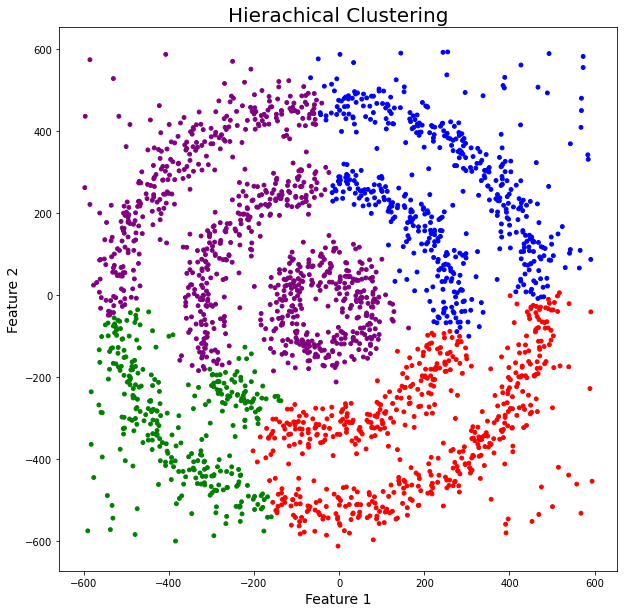

In [19]:
df['HR_labels']=model.labels_
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['HR_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Hierachical Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [22]:
df['DBSCAN_labels']=dbscan.labels_
df['DBSCAN_labels'].value_counts()

-1    2300
Name: DBSCAN_labels, dtype: int64

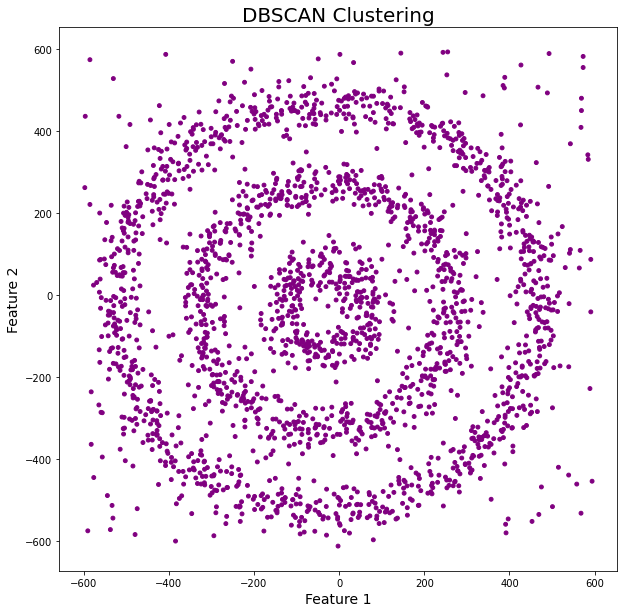

In [23]:
df['DBSCAN_labels']=dbscan.labels_

# Plotting result clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['DBSCAN_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

# K-distance

In [24]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distance, indices = nbrs.kneighbors(df[[0,1]])

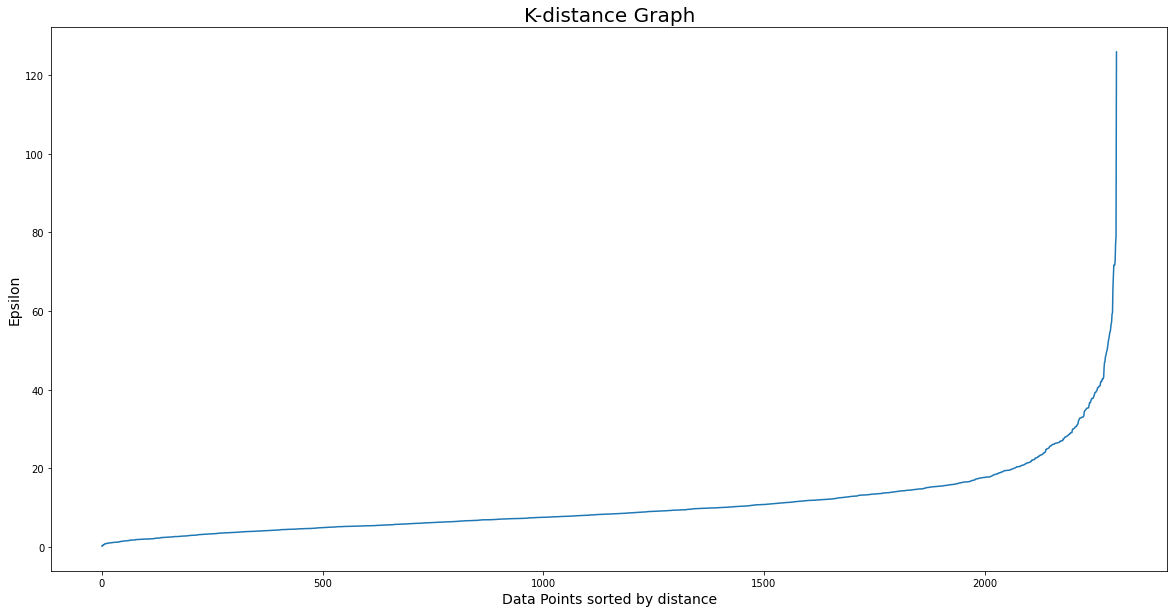

In [25]:
distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.figure(figsize=(20,10))
plt.plot(distance)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [26]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [27]:
df['DBSCAN_opt_labels'] = dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

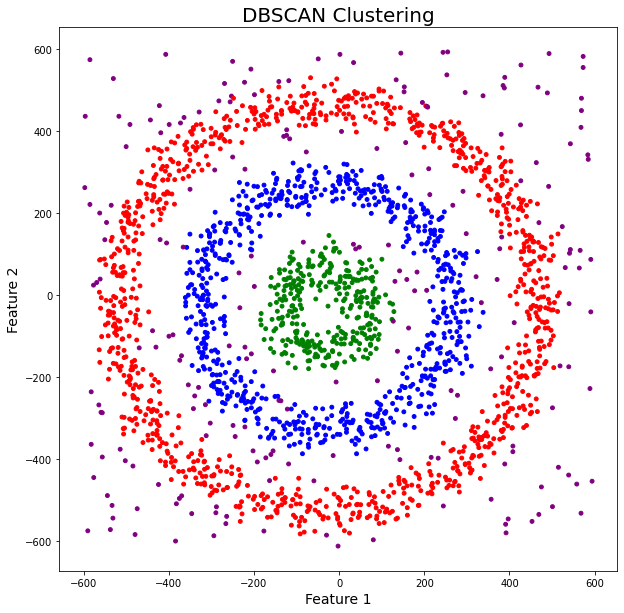

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=df['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()